Train Epoch: 0 [0/60000 (0%)]	Loss: 2.301393
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.555040
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.831344
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.759150
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.479112
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.473707
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.288949
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.479961
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.285994
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.521618

Test set: Average loss: 0.1365, Accuracy: 9565/10000 (96%)



SVMdefend.py:29: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.X_train==None:


defend label: [2]


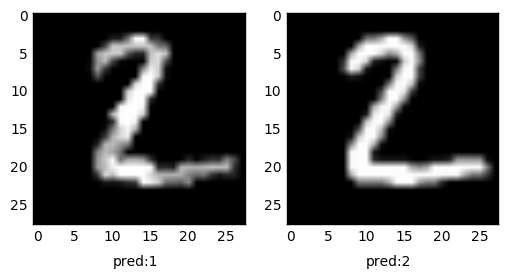

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mnistNet import *
from l2_attack import *
from SVMdefend import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from mnistNet import mnistModel
from sklearn.svm import SVC
import numpy as np

model=mnistModel()
model.getModel(epochs=1)
att=l2_attack(model=model,iters=1000,c=100,verbose=False)

originimg=model.testdata[1][0]
newimg=att.attack(x=originimg,target=[0,1,0,0,0,0,0,0,0,0],kappa=0)
newpred=model.pred(newimg[None,:]).numpy()
originpred=model.pred(Variable(originimg[None,:])).numpy()
fig,axs = plt.subplots(1,2)
axs[0].imshow(newimg.data.numpy().reshape(28,28),cmap = plt.cm.gray)
axs[0].text(10,33,'pred:{}'.format(newpred[0][0]))
axs[1].imshow(originimg.numpy().reshape(28,28),cmap = plt.cm.gray)
axs[1].text(10,33,'pred:{}'.format(originpred[0][0]))


defend=SVMDefend(model=model)
defend.preparedata()
defend.train_svc()
test_X=originimg
test_X=test_X[None,:]
y_pred=defend.predict(test_X)
print 'defend label: {}'.format(y_pred)


origin CNN label:0, attacked CNN pred:1. defend label: 2
origin CNN label:0, attacked CNN pred:2. defend label: 2
origin CNN label:0, attacked CNN pred:3. defend label: 2
origin CNN label:0, attacked CNN pred:4. defend label: 0
origin CNN label:0, attacked CNN pred:5. defend label: 5
origin CNN label:0, attacked CNN pred:6. defend label: 6
origin CNN label:0, attacked CNN pred:7. defend label: 0
origin CNN label:0, attacked CNN pred:8. defend label: 8
origin CNN label:0, attacked CNN pred:9. defend label: 0
origin CNN label:1, attacked CNN pred:0. defend label: 0
origin CNN label:1, attacked CNN pred:2. defend label: 1
origin CNN label:1, attacked CNN pred:3. defend label: 1
origin CNN label:1, attacked CNN pred:4. defend label: 4
origin CNN label:1, attacked CNN pred:5. defend label: 5
origin CNN label:1, attacked CNN pred:6. defend label: 6
origin CNN label:1, attacked CNN pred:7. defend label: 8
origin CNN label:1, attacked CNN pred:8. defend label: 8
origin CNN label:1, attacked CN

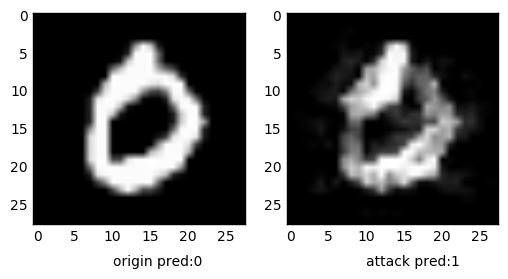

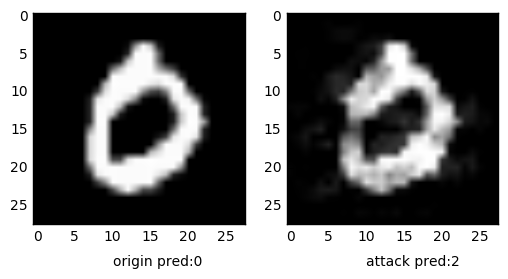

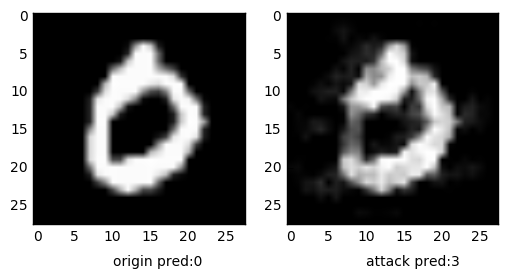

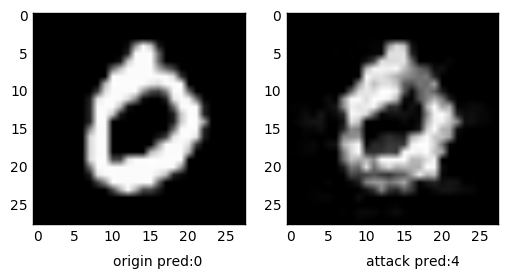

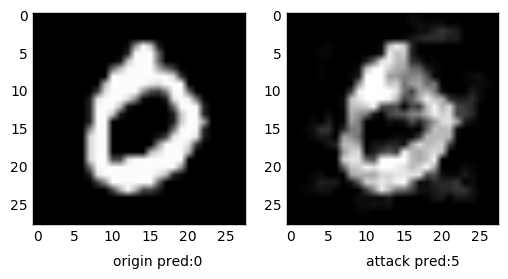

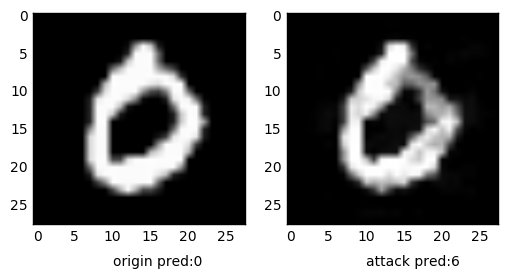

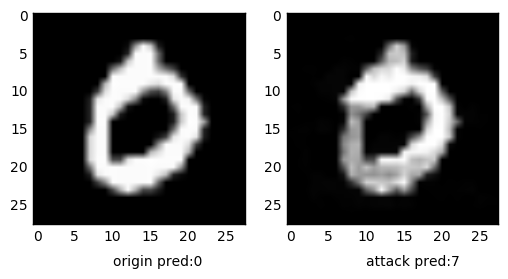

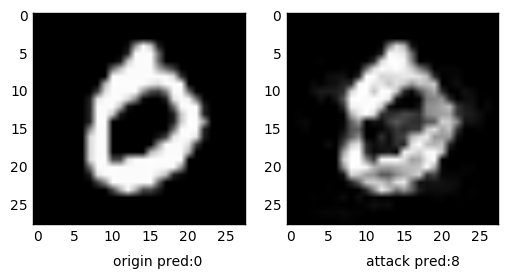

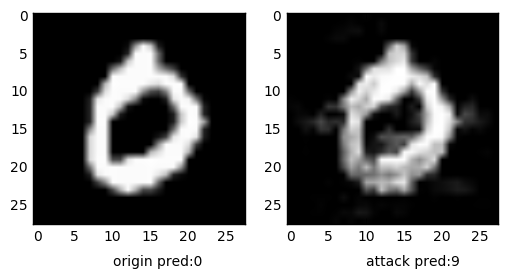

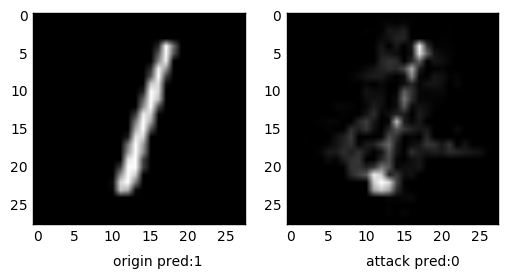

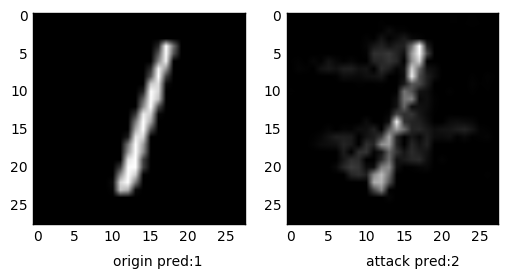

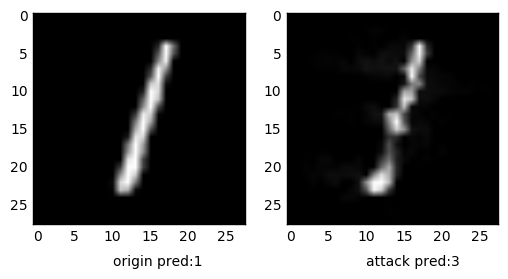

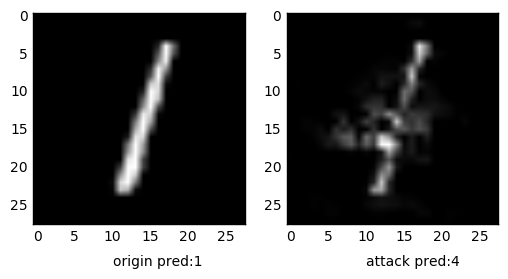

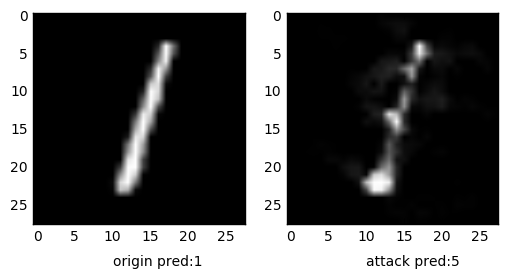

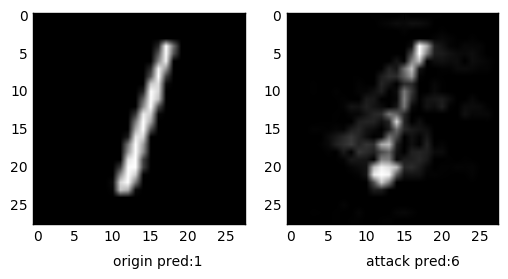

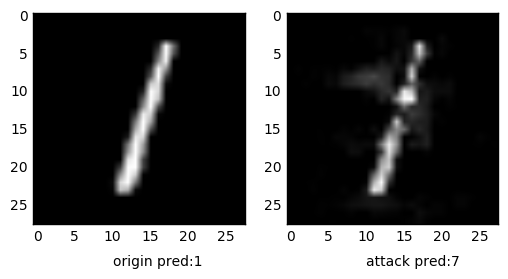

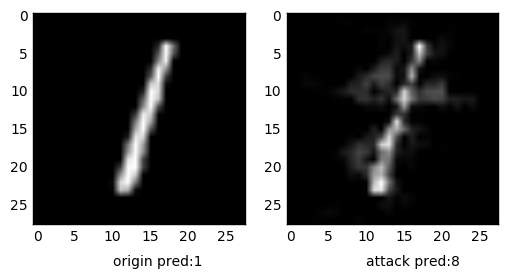

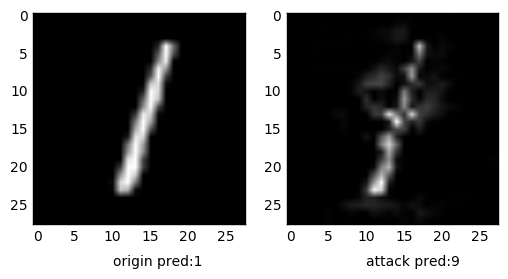

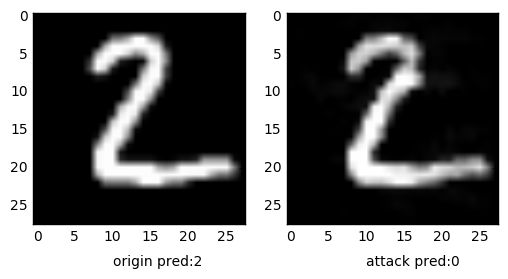

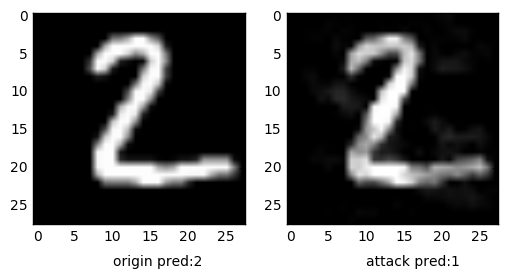

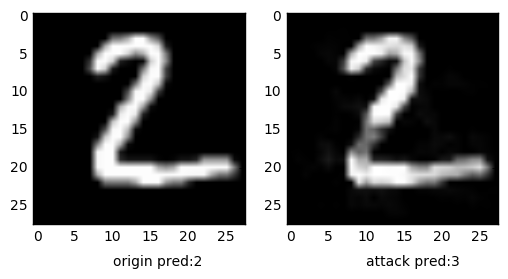

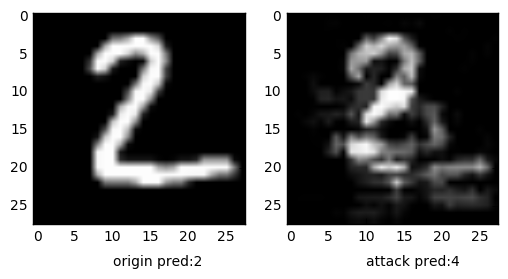

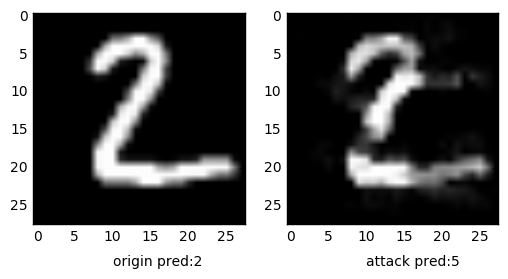

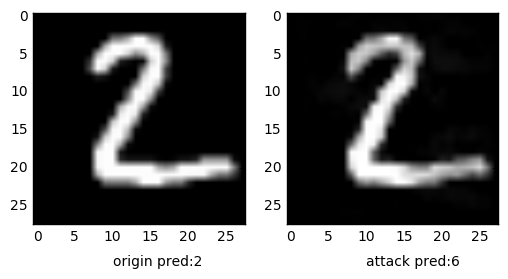

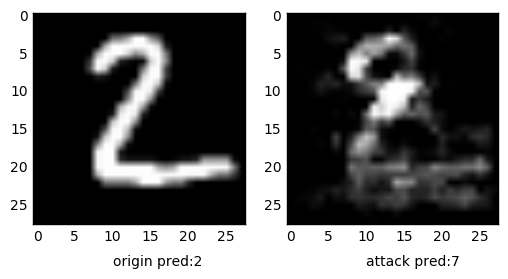

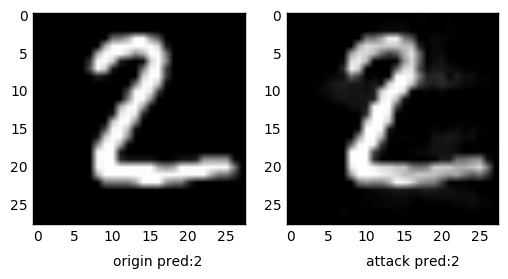

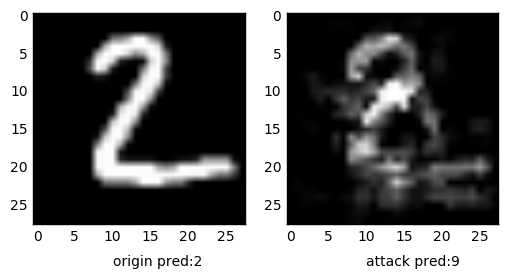

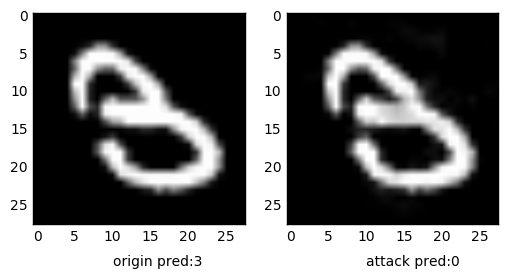

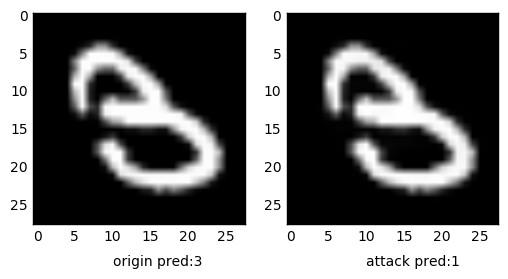

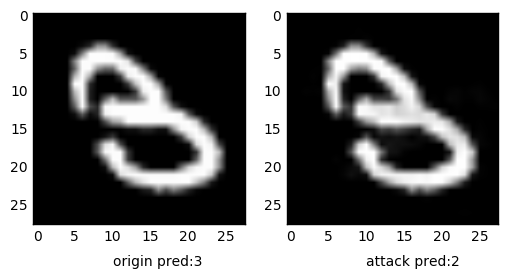

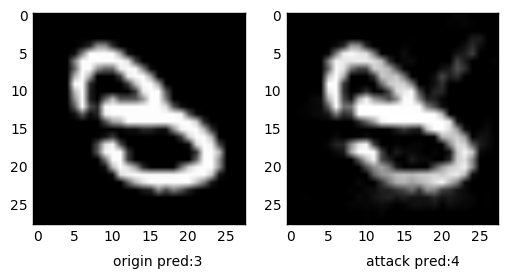

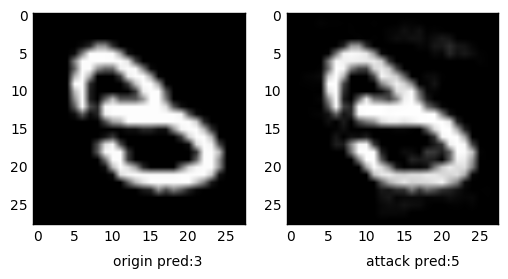

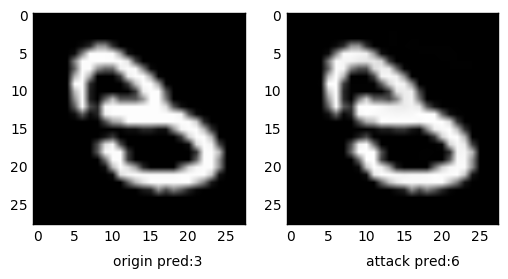

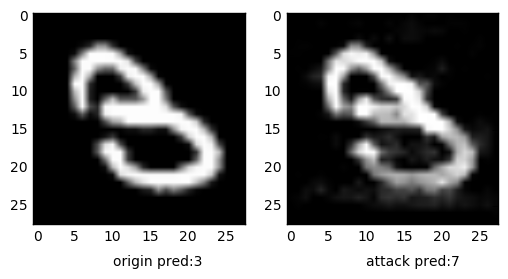

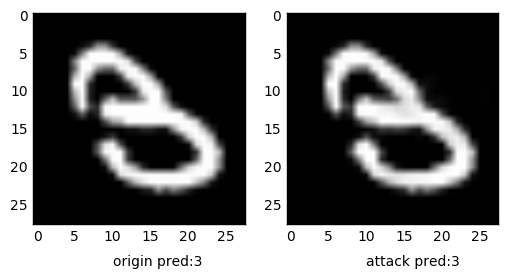

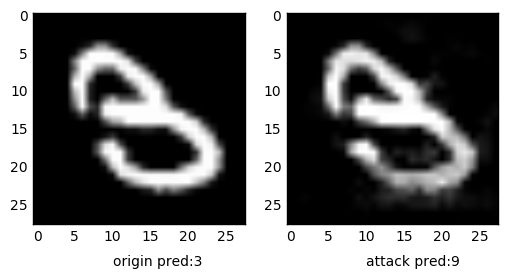

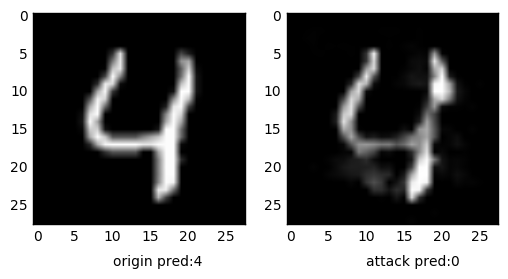

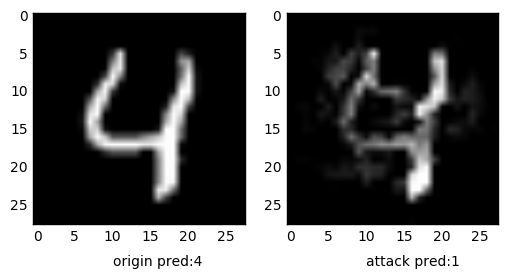

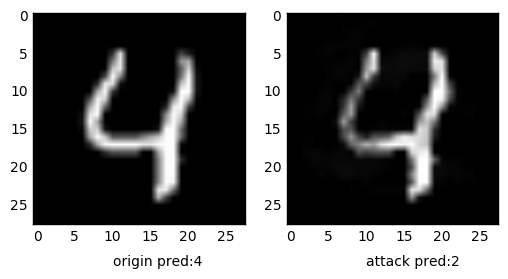

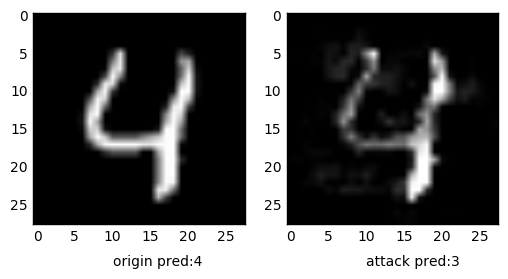

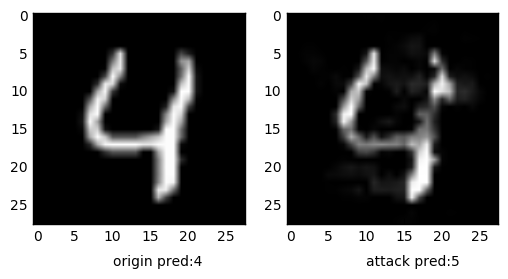

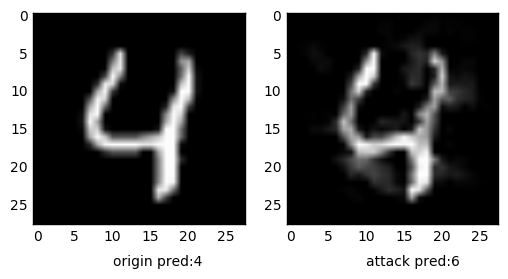

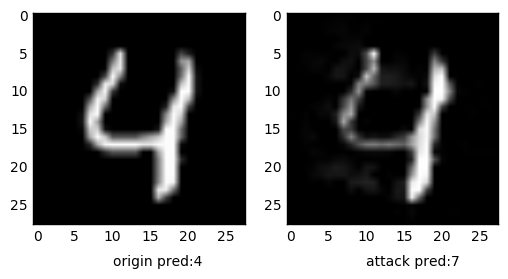

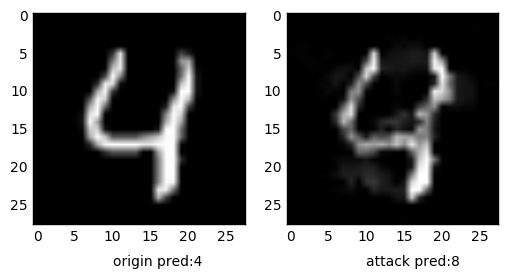

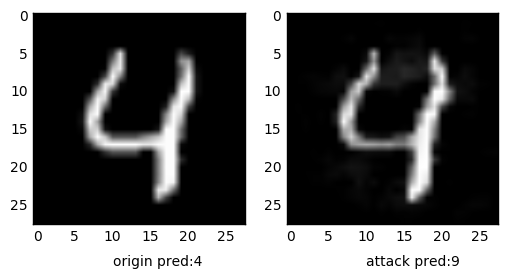

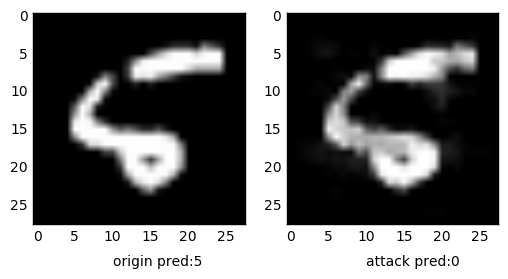

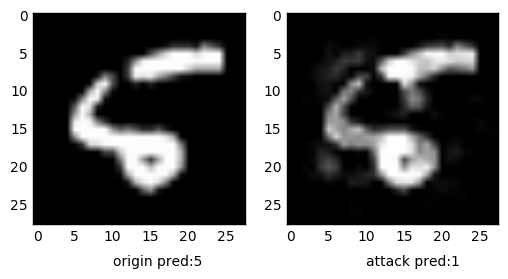

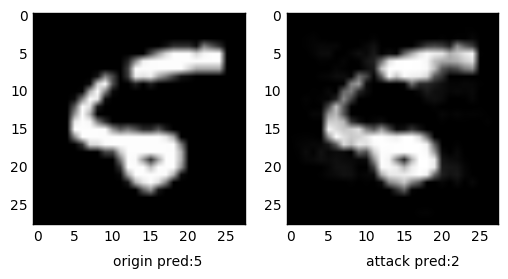

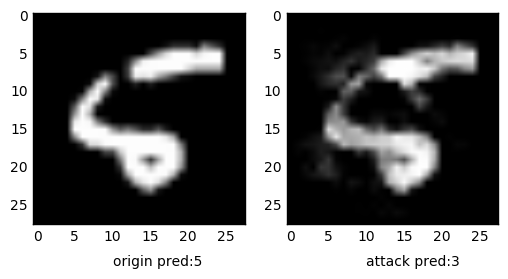

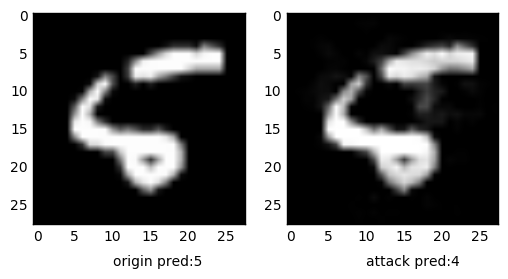

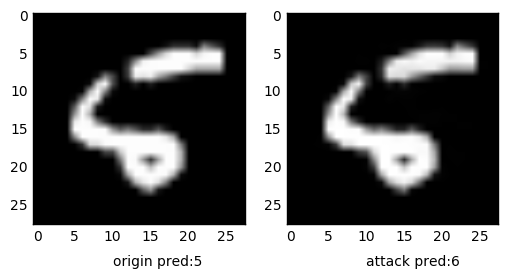

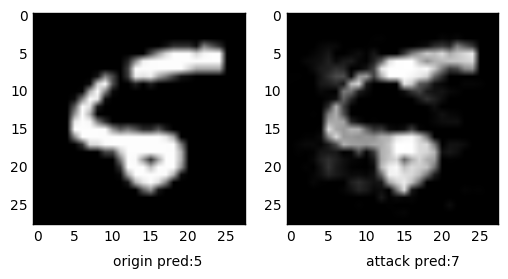

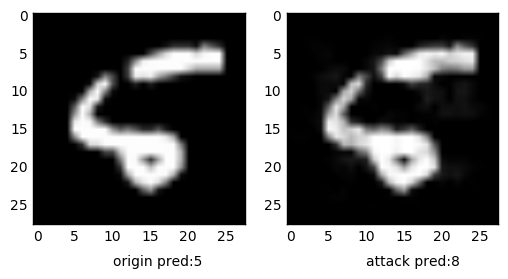

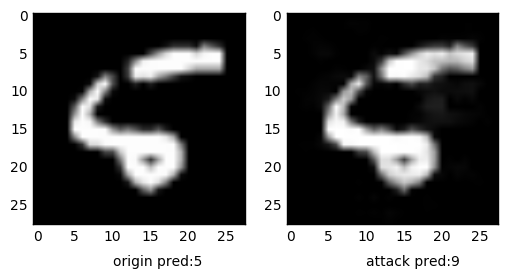

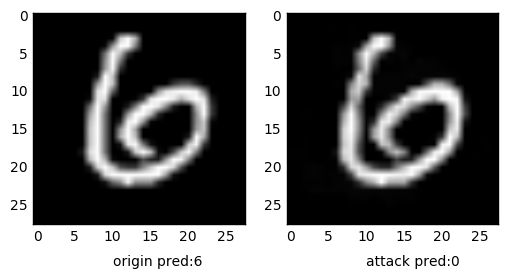

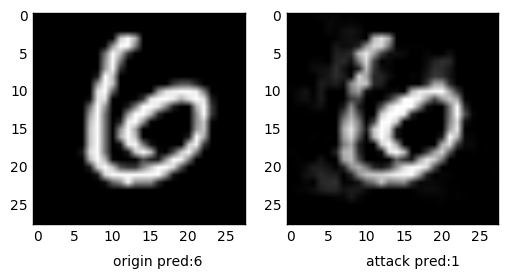

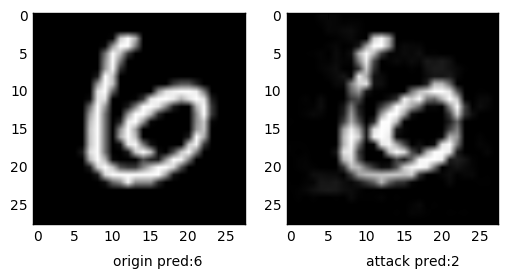

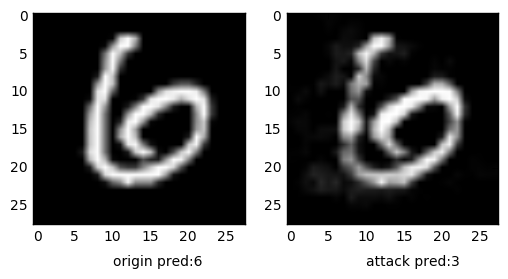

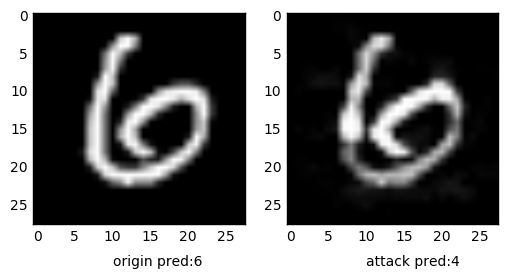

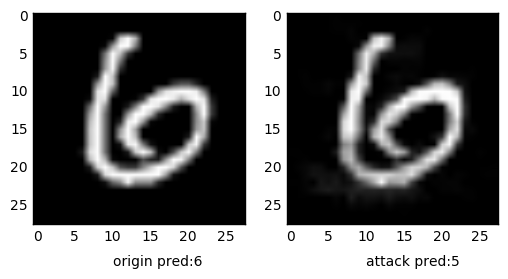

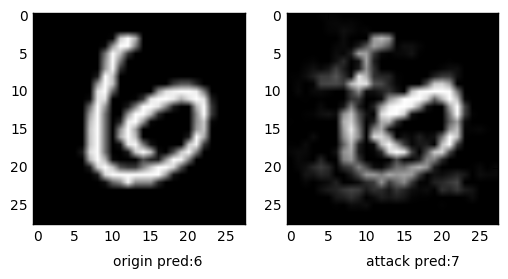

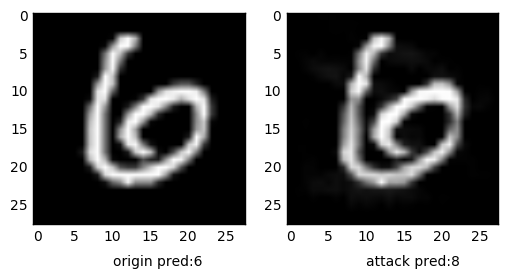

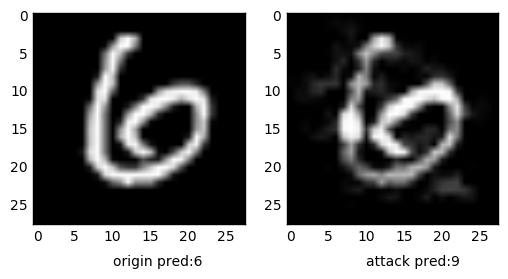

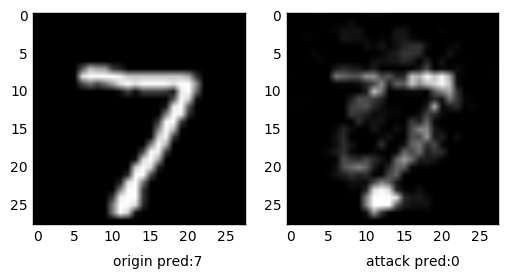

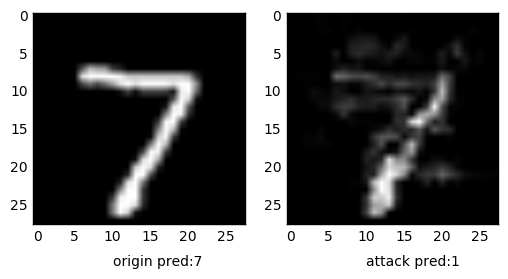

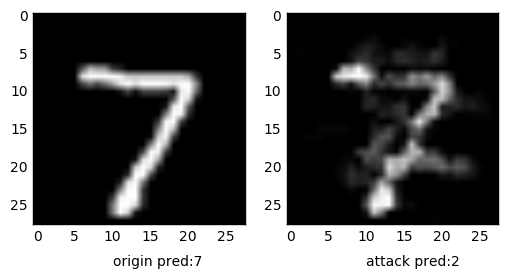

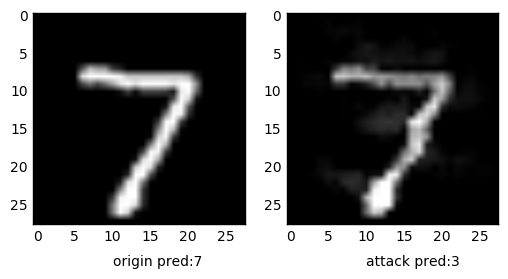

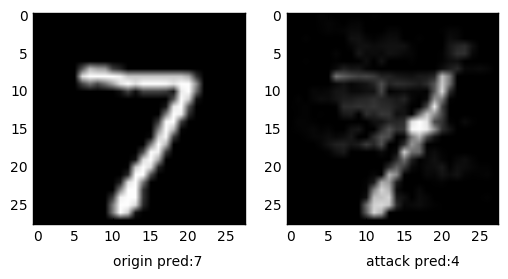

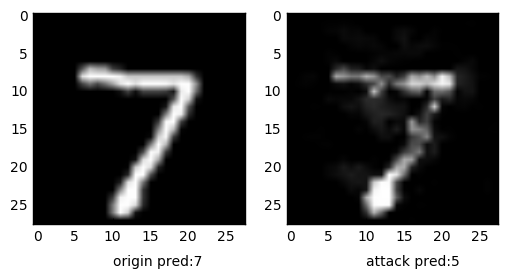

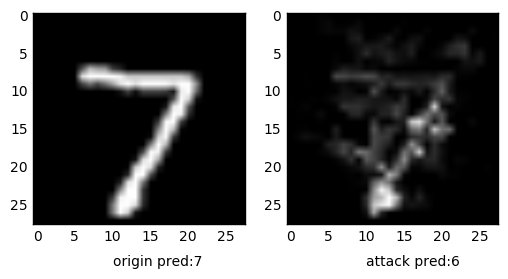

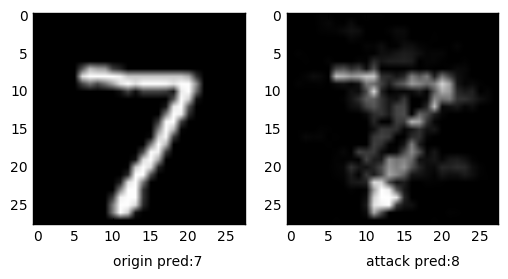

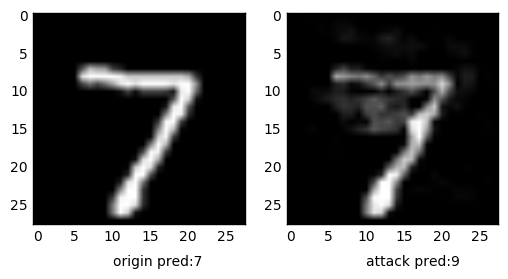

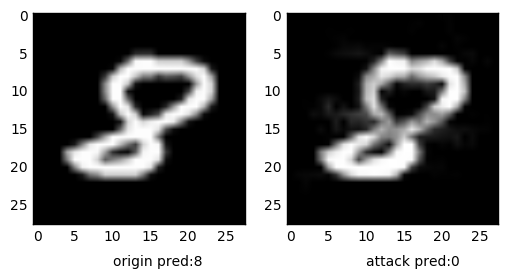

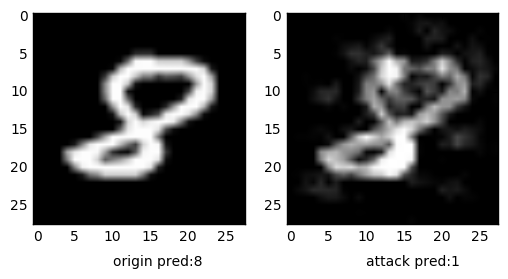

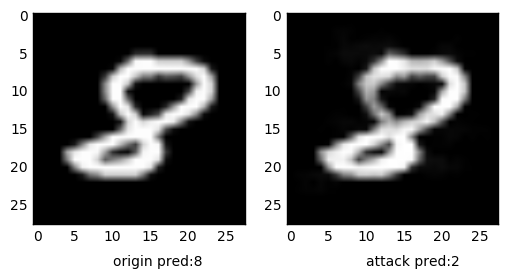

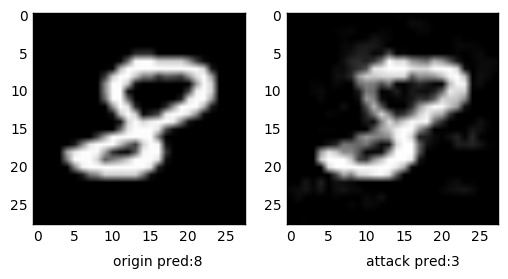

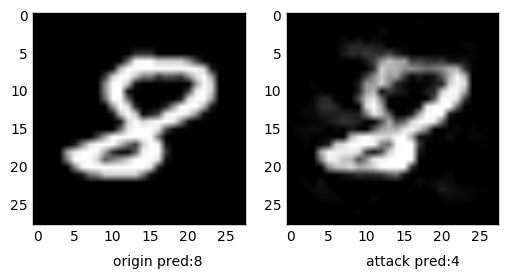

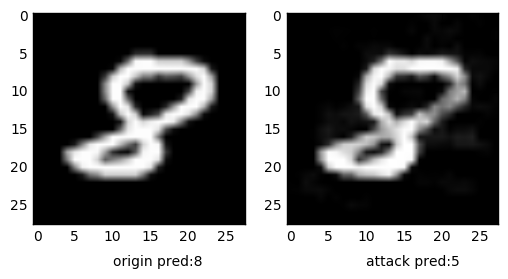

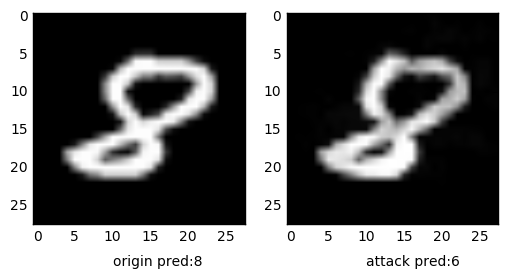

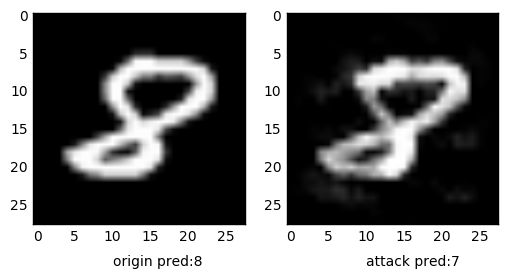

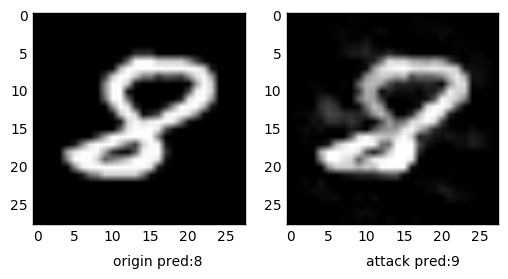

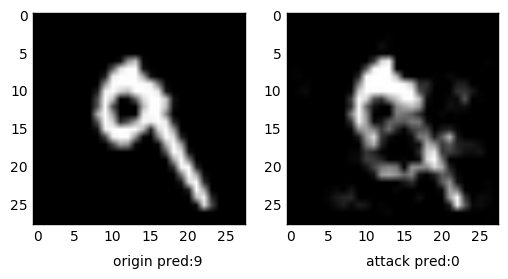

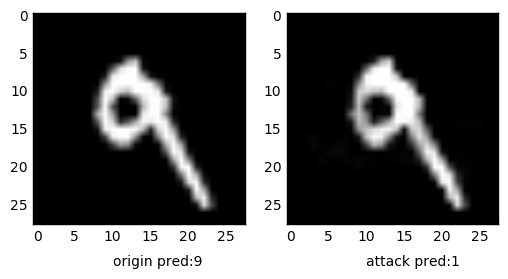

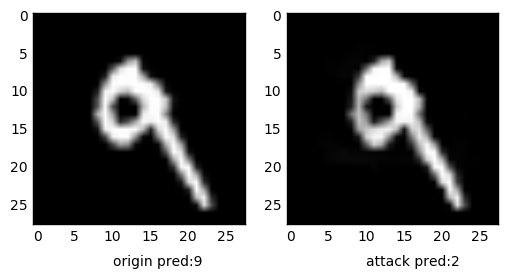

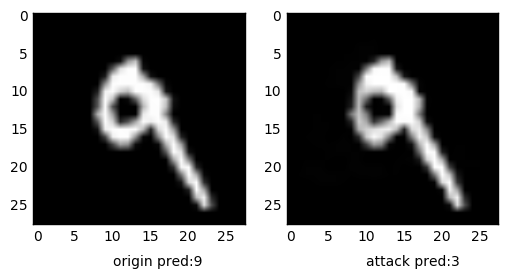

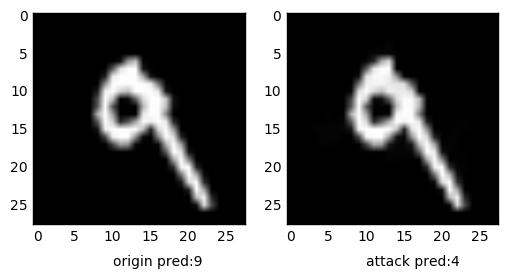

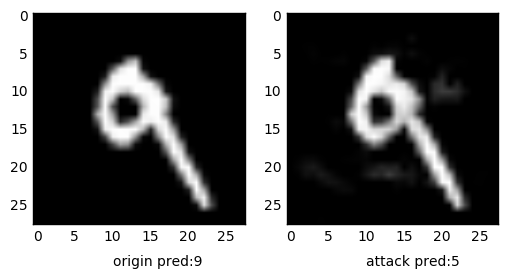

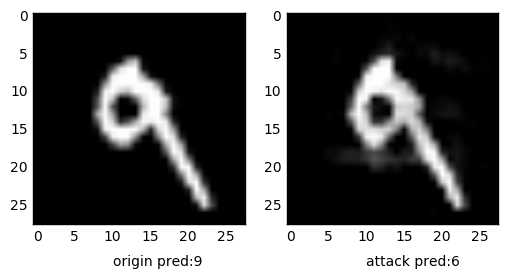

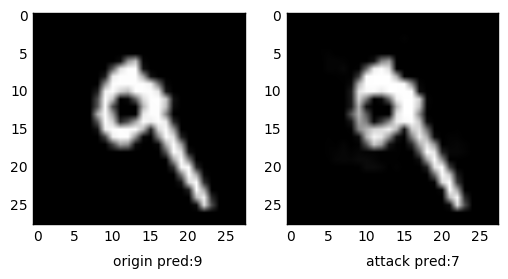

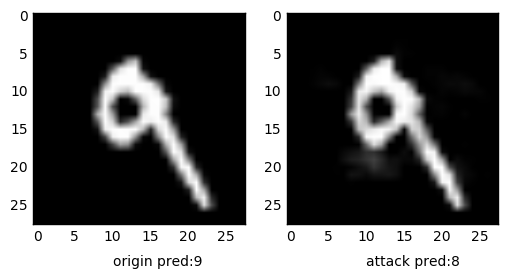

In [25]:
defended=cnntargeted=svmtargeted=0
for i in range(10):
    k=0
    while model.testdata[k][1]!=i:
        k+=1
    originimg=model.testdata[k][0]
    ground_truth=model.testdata[k][1]
    for j in range(10):
        if j!=ground_truth:
            target=[1 if k==j else 0 for k in range(10)]
            att=l2_attack(model=model,iters=3000,c=60,verbose=False)
            newimg=att.attack(x=originimg,target=target,kappa=0)
            newpred=model.pred(newimg[None,:]).numpy()
            originpred=model.pred(Variable(originimg[None,:])).numpy()
            fig,axs = plt.subplots(1,2)
            axs[0].imshow(originimg.numpy().reshape(28,28),cmap = plt.cm.gray)
            axs[0].text(10,33,'origin pred:{}'.format(originpred[0][0]))
            axs[1].imshow(newimg.data.numpy().reshape(28,28),cmap = plt.cm.gray)
            axs[1].text(10,33,'attack pred:{}'.format(newpred[0][0]))
            y_pred=defend.predict(newimg.data[None,:])
            print 'origin CNN label:{}, attacked CNN pred:{}. defend label: {}'.format(originpred[0][0],newpred[0][0],y_pred[0])
            if newpred[0][0]==j:
                cnntargeted+=1
            if y_pred==ground_truth:
                defended+=1
            if y_pred==j:
                svmtargeted+=1

Iters:  [0/10000]	Loss: 287.46685791
Iters:  [100/10000]	Loss: 185.958602905
Iters:  [200/10000]	Loss: 24.8739624023
Iters:  [300/10000]	Loss: 5.99980783463
Iters:  [400/10000]	Loss: 5.87540960312
Iters:  [500/10000]	Loss: 5.73807764053
Iters:  [600/10000]	Loss: 5.62870168686
Iters:  [700/10000]	Loss: 5.51732587814
Iters:  [800/10000]	Loss: 5.40518856049
Iters:  [900/10000]	Loss: 5.29701375961
Iters:  [1000/10000]	Loss: 5.22612047195
Iters:  [1100/10000]	Loss: 5.09780693054
Iters:  [1200/10000]	Loss: 4.98076486588
Iters:  [1300/10000]	Loss: 4.91221237183
Iters:  [1400/10000]	Loss: 4.78319263458
Iters:  [1500/10000]	Loss: 4.72742176056
Iters:  [1600/10000]	Loss: 4.61909008026
Iters:  [1700/10000]	Loss: 4.58309412003
Iters:  [1800/10000]	Loss: 4.63820552826
Iters:  [1900/10000]	Loss: 4.53724145889
Iters:  [2000/10000]	Loss: 4.42227888107
Iters:  [2100/10000]	Loss: 4.41824054718
Iters:  [2200/10000]	Loss: 4.27530193329
Iters:  [2300/10000]	Loss: 4.33318567276
Iters:  [2400/10000]	Loss: 4.

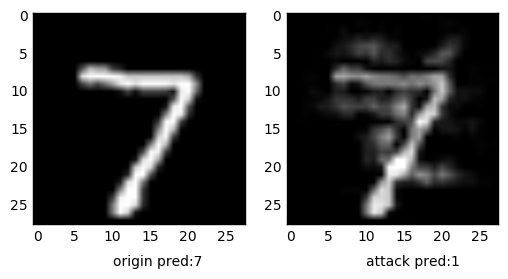

In [41]:
originimg=model.testdata[0][0]
att=l2_attack(model=model,iters=10000,c=15,verbose=True)
newimg=att.attack(x=originimg,target=[0,1,0,0,0,0,0,0,0,0],kappa=0)
newpred=model.pred(newimg[None,:]).numpy()
originpred=model.pred(Variable(originimg[None,:])).numpy()
fig,axs = plt.subplots(1,2)
axs[0].imshow(originimg.numpy().reshape(28,28),cmap = plt.cm.gray)
axs[0].text(10,33,'origin pred:{}'.format(originpred[0][0]))
axs[1].imshow(newimg.data.numpy().reshape(28,28),cmap = plt.cm.gray)
axs[1].text(10,33,'attack pred:{}'.format(newpred[0][0]))
y_pred=defend.predict(newimg.data[None,:])
print 'origin CNN label:{}, attacked CNN pred:{}. defend label: {}'.format(originpred[0][0],newpred[0][0],y_pred[0])

In [37]:
print('defend rate={}, cnntargeted rate={}, svmtargeted rate={}'.format(defended/90.0,cnntargeted/90.0,svmtargeted/90.0))

defend rate=0.5, cnntargeted rate=0.977777777778, svmtargeted rate=0.266666666667
